In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'response', 'response_binary', 'Age_Group_1', 'Age_Group_2',
       'est_av_salary'],
      dtype='object')

In [184]:
!ls

Bitcoin Historical Data - Investing.com-2.csv
Feature Engineering.ipynb
Untitled.ipynb
altcoins.ipynb
bank-full.csv
bank2.csv
bank_cleaned.csv


In [185]:
bank = pd.read_csv('bank_cleaned.csv')

In [186]:
bank.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [600]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 20 columns):
age                40841 non-null int64
job                40841 non-null object
marital            40841 non-null object
education          40841 non-null object
default            40841 non-null object
balance            40841 non-null int64
housing            40841 non-null object
loan               40841 non-null object
day                40841 non-null int64
month              40841 non-null object
duration           40841 non-null float64
campaign           40841 non-null int64
pdays              40841 non-null int64
previous           40841 non-null int64
poutcome           40841 non-null object
response           40841 non-null object
response_binary    40841 non-null int64
Age_Group_1        40841 non-null object
Age_Group_2        40841 non-null object
est_av_salary      30696 non-null object
dtypes: float64(1), int64(7), object(12)
memory usage: 6.2+ MB


In [187]:
bank.poutcome.value_counts()

unknown    34802
failure     4648
success     1391
Name: poutcome, dtype: int64

In [188]:
bank.job.value_counts(dropna=False)

blue-collar      8805
management       8565
technician       6954
admin.           4705
services         3801
retired          2020
self-employed    1443
entrepreneur     1340
unemployed       1212
housemaid        1149
student           689
other             158
Name: job, dtype: int64

In [189]:
bank.default.value_counts()

no     40078
yes      763
Name: default, dtype: int64

In [190]:
bank.response_binary.value_counts()

0    36202
1     4639
Name: response_binary, dtype: int64

In [191]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
Unnamed: 0         40841 non-null int64
age                40841 non-null int64
job                40841 non-null object
marital            40841 non-null object
education          40841 non-null object
default            40841 non-null object
balance            40841 non-null int64
housing            40841 non-null object
loan               40841 non-null object
day                40841 non-null int64
month              40841 non-null object
duration           40841 non-null float64
campaign           40841 non-null int64
pdays              40841 non-null int64
previous           40841 non-null int64
poutcome           40841 non-null object
response           40841 non-null object
response_binary    40841 non-null int64
dtypes: float64(1), int64(8), object(9)
memory usage: 5.6+ MB


In [192]:
bank.isna().sum()

Unnamed: 0         0
age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response           0
response_binary    0
dtype: int64

In [193]:
bank.campaign.value_counts()

1     15788
2     11306
3      4954
4      3241
5      1606
6      1169
7       649
8       489
9       288
10      248
11      180
12      145
13      123
14       84
15       82
16       75
17       64
18       45
19       43
20       39
21       34
24       20
23       20
22       20
25       19
28       16
29       13
26       12
31       10
32        9
27        9
30        8
33        6
34        4
36        4
35        3
38        3
50        2
43        2
41        2
46        1
37        1
51        1
55        1
58        1
39        1
44        1
Name: campaign, dtype: int64

In [194]:
bank.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response', 'response_binary'],
      dtype='object')

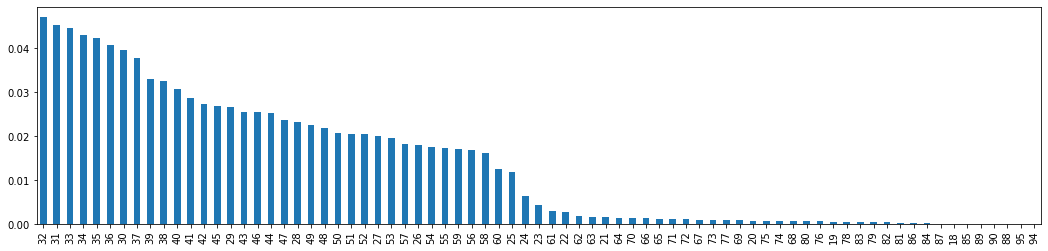

In [195]:
bank['age'].value_counts(normalize=True).plot(kind='bar', figsize=(18, 4));

In [196]:
bank.age.value_counts()

32    1922
31    1846
33    1819
34    1759
35    1728
      ... 
89       2
90       2
88       2
95       2
94       1
Name: age, Length: 75, dtype: int64

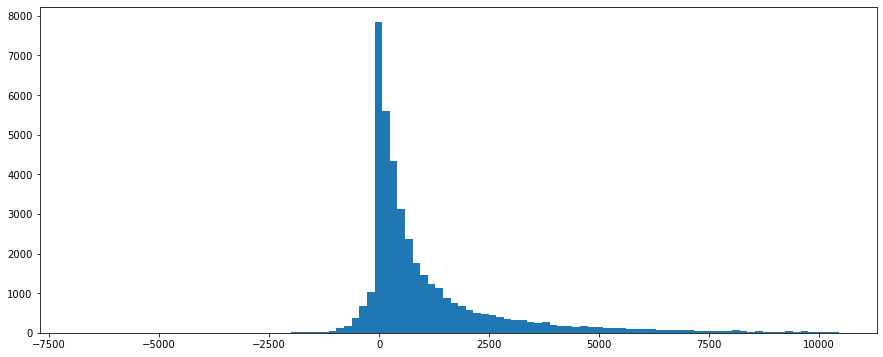

In [234]:
plt.figure(figsize=(15,6))
plt.hist(bank.balance, bins=100,)
plt.show()

In [235]:
bank.response

0         no
1         no
2         no
3         no
4         no
        ... 
40836    yes
40837    yes
40838    yes
40839    yes
40840     no
Name: response, Length: 40841, dtype: object

In [240]:
bank_no = bank.loc[bank['response']=='no']
bank_yes = bank.loc[bank['response']=='yes']

(array([ 3769., 11987., 11434.,     0.,  8130.,   508.,     0.,   243.,
           62.,    69.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

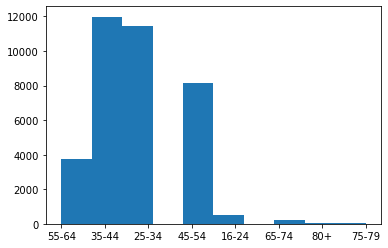

In [246]:
plt.hist(bank_no.Age_Group_2)

(array([ 547., 1234.,  810.,    0., 1594.,  168.,    0.,  180.,   63.,
          43.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

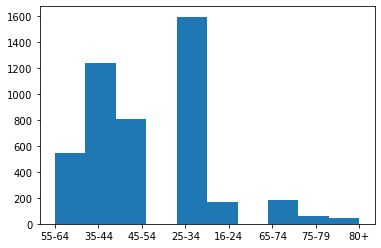

In [243]:
plt.hist(bank_yes.Age_Group_2)

In [197]:
bank.age.unique()

array([58, 44, 33, 35, 28, 42, 43, 41, 29, 53, 57, 51, 60, 56, 32, 25, 40,
       39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 45, 47, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 65, 68, 64, 69,
       72, 71, 70, 76, 63, 90, 82, 73, 74, 78, 85, 80, 94, 79, 19, 77, 86,
       95, 81, 18, 89, 84, 87, 88])

In [198]:
bank.age.min()

18

In [199]:
bank.loc[(bank['age'] < 30 ) , 'Age_Group_1'] = 'Below 30'
bank.loc[((bank['age'] >= 30 ) & (bank['age'] < 40 )), 'Age_Group_1'] = '30-39'
bank.loc[((bank['age'] >= 40 ) & (bank['age'] < 50 )), 'Age_Group_1'] = '40-49'
bank.loc[((bank['age'] >= 50 ) & (bank['age'] < 60 )), 'Age_Group_1'] = '50-59'
bank.loc[((bank['age'] >= 60 )), 'Age_Group_1'] = 'Above 60'

In [200]:
bank.Age_Group_1.value_counts()

30-39       16566
40-49       10528
50-59        7514
Below 30     4745
Above 60     1488
Name: Age_Group_1, dtype: int64

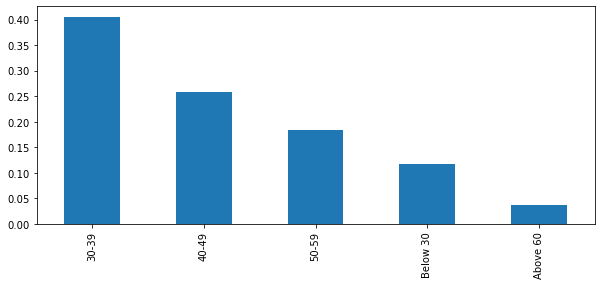

In [201]:
bank['Age_Group_1'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 4));

In [202]:
#https://www.ons.gov.uk/peoplepopulationandcommunity/householdcharacteristics/homeinternetandsocialmediausage/adhocs/009078internetbankingbyagegroup2018

In [203]:
bank.loc[((bank['age'] >= 16 ) & (bank['age'] <= 24 )), 'Age_Group_2'] = '16-24'
bank.loc[((bank['age'] >= 25 ) & (bank['age'] <= 34 )), 'Age_Group_2'] = '25-34'
bank.loc[((bank['age'] >= 35 ) & (bank['age'] <= 44 )), 'Age_Group_2'] = '35-44'
bank.loc[((bank['age'] >= 45 ) & (bank['age'] <= 54 )), 'Age_Group_2'] = '45-54'
bank.loc[((bank['age'] >= 55 ) & (bank['age'] <= 64 )), 'Age_Group_2'] = '55-64'
bank.loc[((bank['age'] >= 65 ) & (bank['age'] <= 74 )), 'Age_Group_2'] = '65-74'
bank.loc[((bank['age'] >= 75 ) & (bank['age'] <= 79 )), 'Age_Group_2'] = '75-79'
bank.loc[((bank['age'] >= 80 )), 'Age_Group_2'] = '80+'

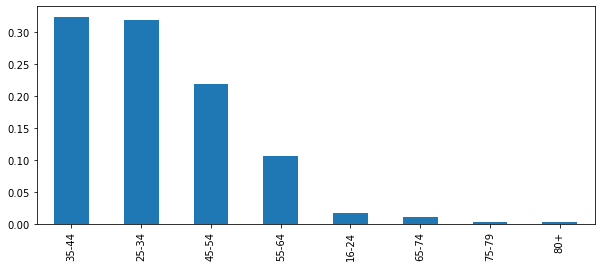

In [204]:
bank['Age_Group_2'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 4));

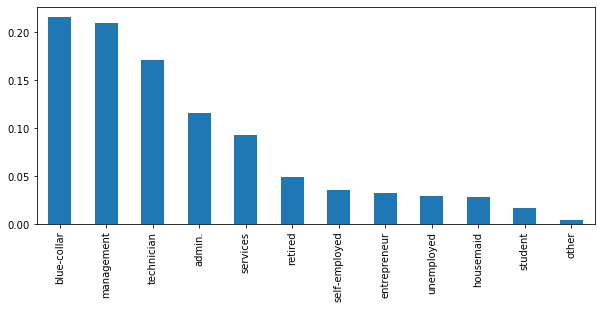

In [205]:
bank['job'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 4));

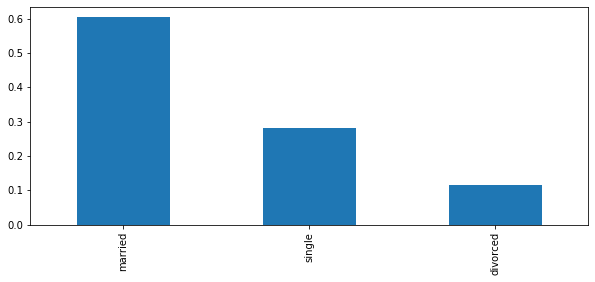

In [206]:
bank['marital'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 4));

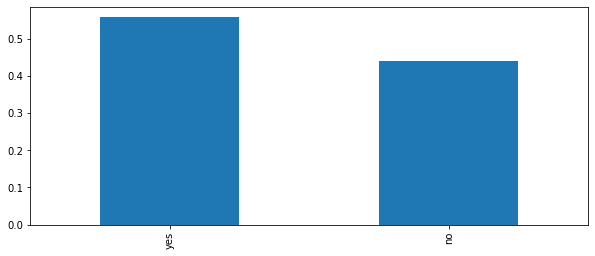

In [207]:
bank['housing'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 4));

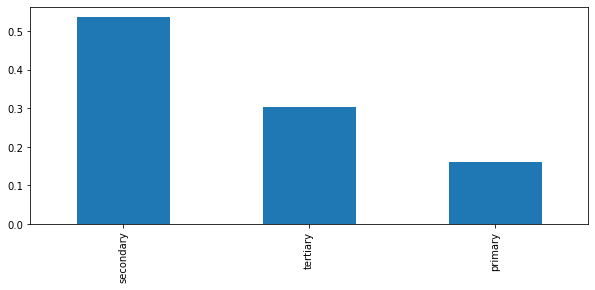

In [208]:
bank['education'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 4));

In [209]:
bank.job.unique()

array(['management', 'technician', 'entrepreneur', 'retired', 'admin.',
       'services', 'blue-collar', 'self-employed', 'unemployed',
       'housemaid', 'student', 'other'], dtype=object)

In [210]:
bank.education.value_counts(dropna=False)

secondary    21933
tertiary     12380
primary       6528
Name: education, dtype: int64

In [212]:
#Management - €21,936
#Technician -€1,087/mo 13032
#Entraprenuer- 
# retired - 0 
# admin - €890/mo 10680
# services - €700  8400
#blue-collar -  €900 8400
# self-employed - 
# unemployed - 0 
# housemaid -  €700 8400 
#student -  €304 3648
# other- 17,989

# https://www.statista.com/statistics/419498/average-annual-wages-portugal-y-on-y/
    
#     2008 - 17358
#     2009 - 18159
#     2010 - 18090
    
# student 20 hours
# 9-6 
    
# https://beportugal.com/salaries-in-portugal/

In [213]:
bank.job.unique()

array(['management', 'technician', 'entrepreneur', 'retired', 'admin.',
       'services', 'blue-collar', 'self-employed', 'unemployed',
       'housemaid', 'student', 'other'], dtype=object)

In [214]:
bank.loc[(bank['job']=='management'),'est_av_salary'] = 21936
bank.loc[(bank['job']=='technician'),'est_av_salary'] = 13032
bank.loc[(bank['job']=='entrapreneur'),'est_av_salary'] = '-'
bank.loc[(bank['job']=='retired'),'est_av_salary'] = 0
bank.loc[(bank['job']=='admin.'),'est_av_salary'] = 10680
bank.loc[(bank['job']=='services'),'est_av_salary'] = 8400
bank.loc[(bank['job']=='self-employed'),'est_av_salary'] = '-'
bank.loc[(bank['job']=='unemployed'),'est_av_salary'] = 0
bank.loc[(bank['job']=='housemaid'),'est_av_salary'] = 8400
bank.loc[(bank['job']=='student'),'est_av_salary'] = 3648
bank.loc[(bank['job']=='other'),'est_av_salary'] = 17989

In [215]:
bank.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,...,duration,campaign,pdays,previous,poutcome,response,response_binary,Age_Group_1,Age_Group_2,est_av_salary
0,0,58,management,married,tertiary,no,2143,yes,no,5,...,4.35,1,-1,0,unknown,no,0,50-59,55-64,21936
1,1,44,technician,single,secondary,no,29,yes,no,5,...,2.52,1,-1,0,unknown,no,0,40-49,35-44,13032
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,...,1.27,1,-1,0,unknown,no,0,30-39,25-34,NaN
3,5,35,management,married,tertiary,no,231,yes,no,5,...,2.32,1,-1,0,unknown,no,0,30-39,35-44,21936
4,6,28,management,single,tertiary,no,447,yes,yes,5,...,3.62,1,-1,0,unknown,no,0,Below 30,25-34,21936


In [216]:
bank.drop(["Unnamed: 0"], axis=1, inplace=True)

In [218]:
bank.to_csv('/Users/naweedahmed/Desktop/Flatiron_Feb/capstone/bank2.csv')

In [217]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,Age_Group_1,Age_Group_2,est_av_salary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0,50-59,55-64,21936
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0,40-49,35-44,13032
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,30-39,25-34,NaN
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0,30-39,35-44,21936
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0,Below 30,25-34,21936


In [219]:
bank2 = pd.read_csv('bank2.csv')

In [220]:
bank2.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,...,duration,campaign,pdays,previous,poutcome,response,response_binary,Age_Group_1,Age_Group_2,est_av_salary
0,0,58,management,married,tertiary,no,2143,yes,no,5,...,4.35,1,-1,0,unknown,no,0,50-59,55-64,21936.0
1,1,44,technician,single,secondary,no,29,yes,no,5,...,2.52,1,-1,0,unknown,no,0,40-49,35-44,13032.0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,...,1.27,1,-1,0,unknown,no,0,30-39,25-34,NaN
3,3,35,management,married,tertiary,no,231,yes,no,5,...,2.32,1,-1,0,unknown,no,0,30-39,35-44,21936.0
4,4,28,management,single,tertiary,no,447,yes,yes,5,...,3.62,1,-1,0,unknown,no,0,Below 30,25-34,21936.0


In [223]:
bank2.response.value_counts(normalize=True)*100

no     88.641316
yes    11.358684
Name: response, dtype: float64

In [253]:
bank_ent = bank.loc[bank['job']=='entrepreneur']

In [254]:
bank_ent.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,Age_Group_1,Age_Group_2,est_av_salary
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,30-39,25-34,NaN
5,42,entrepreneur,divorced,tertiary,yes,2,yes,no,5,may,6.33,1,-1,0,unknown,no,0,40-49,35-44,NaN
23,52,entrepreneur,married,secondary,no,113,yes,yes,5,may,2.12,1,-1,0,unknown,no,0,50-59,45-54,NaN
48,38,entrepreneur,single,tertiary,no,243,no,yes,5,may,2.90,1,-1,0,unknown,no,0,30-39,35-44,NaN
82,57,entrepreneur,divorced,secondary,no,-37,no,no,5,may,2.88,1,-1,0,unknown,no,0,50-59,55-64,NaN


In [256]:
bank2['response'].value_counts()

no     36202
yes     4639
Name: response, dtype: int64

In [255]:
bank_ent['response'].value_counts()

no     1231
yes     109
Name: response, dtype: int64

In [259]:
bank_yes.job.value_counts()

management       1125
technician        754
blue-collar       637
admin.            563
retired           448
services          332
student           203
unemployed        190
self-employed     162
entrepreneur      109
housemaid         101
other              15
Name: job, dtype: int64

(array([  2.,   0.,   0.,   0.,   9.,   6.,  21.,  38., 416., 235.,  98.,
         89.,  67.,  52.,  33.,  37.,  25.,  25.,  19.,  21.,  21.,  11.,
         10.,  12.,  10.,   1.,   4.,   7.,   5.,   8.,   7.,  10.,   1.,
          4.,   3.,   6.,   0.,   3.,   1.,   3.,   6.,   2.,   2.,   2.,
          2.,   0.,   1.,   1.,   1.,   3.]),
 array([-2082.  , -1833.36, -1584.72, -1336.08, -1087.44,  -838.8 ,
         -590.16,  -341.52,   -92.88,   155.76,   404.4 ,   653.04,
          901.68,  1150.32,  1398.96,  1647.6 ,  1896.24,  2144.88,
         2393.52,  2642.16,  2890.8 ,  3139.44,  3388.08,  3636.72,
         3885.36,  4134.  ,  4382.64,  4631.28,  4879.92,  5128.56,
         5377.2 ,  5625.84,  5874.48,  6123.12,  6371.76,  6620.4 ,
         6869.04,  7117.68,  7366.32,  7614.96,  7863.6 ,  8112.24,
         8360.88,  8609.52,  8858.16,  9106.8 ,  9355.44,  9604.08,
         9852.72, 10101.36, 10350.  ]),
 <a list of 50 Patch objects>)

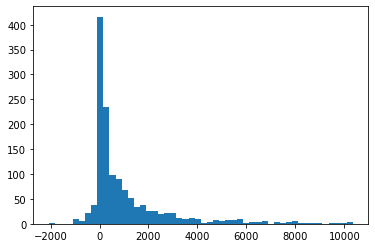

In [263]:

plt.hist(bank_ent.balance, bins=50)

In [284]:
bank_bal_plus = bank.loc[bank['balance']>0]
bank_bal_plus.response.value_counts()

no     29895
yes     4170
Name: response, dtype: int64

In [264]:
bank_bal = bank.loc[bank['balance']<=0]

In [265]:
bank_bal.response.value_counts()

no     6307
yes     469
Name: response, dtype: int64

In [267]:
import seaborn as sns

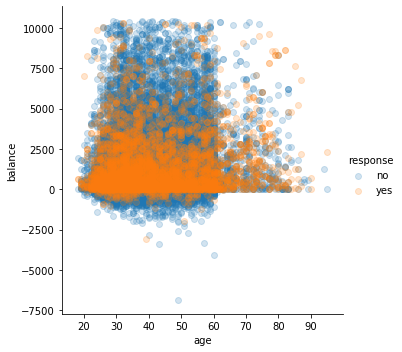

In [282]:
sns.lmplot(x="age", y="balance",data = bank2,
                     hue = "response",fit_reg=False,  scatter_kws={'alpha':0.2}
                     )

In [286]:
bank2.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response', 'response_binary',
       'Age_Group_1', 'Age_Group_2', 'est_av_salary'],
      dtype='object')

In [341]:
bank2['day'] = bank2['day'].astype(str)

In [380]:
bank2['date_time'] = bank2['day']+ '-' + bank2['month']

In [381]:
bank2['date_time'] = pd.to_datetime(bank2['date_time'], format='%d-%b')

In [385]:
bank_month = pd.DataFrame(bank2['date_time'].value_counts())

In [387]:
bank_month = bank_month.resample('M')

In [389]:
bank_month = bank_month.count()

In [391]:
bank_month

,date_time
1900-01-31,16
1900-02-28,24
1900-03-31,27
1900-04-30,25
1900-05-31,28
1900-06-30,30
1900-07-31,31
1900-08-31,29
1900-09-30,28
1900-10-31,29


In [392]:
bank_month = bank2.groupby('month').agg(Counts=('month','count')).reset_index()

In [393]:
bank_month['month'].unique()

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [394]:
bank_month['month'].replace('jan', 1, inplace=True)
bank_month['month'].replace('feb', 2, inplace=True)
bank_month['month'].replace('mar', 3, inplace=True)
bank_month['month'].replace('apr', 4, inplace=True)
bank_month['month'].replace('may', 5, inplace=True)
bank_month['month'].replace('jun', 6, inplace=True)
bank_month['month'].replace('jul', 7, inplace=True)
bank_month['month'].replace('aug', 8, inplace=True)
bank_month['month'].replace('sep', 9, inplace=True)
bank_month['month'].replace('oct', 10, inplace=True)
bank_month['month'].replace('nov', 11, inplace=True)
bank_month['month'].replace('dec', 12, inplace=True)

In [399]:
bank_month.sort_values(by='month',ascending=True, inplace=True)

In [401]:
bank_month

,month,Counts
4,1,1183
3,2,2258
7,3,407
0,4,2529
8,5,12496
6,6,4853
5,7,6520
1,8,5877
11,9,457
10,10,605


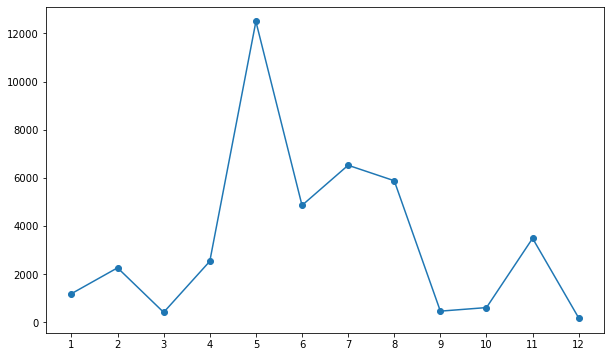

In [415]:
plt.figure(figsize=(10,6))
plt.plot(bank_month['month'], bank_month['Counts'], marker='o')
plt.xticks(range(1,13))
plt.show()

In [423]:
bank_no.response.value_counts()

no    36202
Name: response, dtype: int64

In [419]:
bank_no_month = bank_no.groupby('month').agg(Counts=('month','count')).reset_index()

In [420]:
bank_no_month['month'].replace('jan', 1, inplace=True)
bank_no_month['month'].replace('feb', 2, inplace=True)
bank_no_month['month'].replace('mar', 3, inplace=True)
bank_no_month['month'].replace('apr', 4, inplace=True)
bank_no_month['month'].replace('may', 5, inplace=True)
bank_no_month['month'].replace('jun', 6, inplace=True)
bank_no_month['month'].replace('jul', 7, inplace=True)
bank_no_month['month'].replace('aug', 8, inplace=True)
bank_no_month['month'].replace('sep', 9, inplace=True)
bank_no_month['month'].replace('oct', 10, inplace=True)
bank_no_month['month'].replace('nov', 11, inplace=True)
bank_no_month['month'].replace('dec', 12, inplace=True)

In [421]:
bank_no_month.sort_values(by='month',ascending=True, inplace=True)

In [424]:
bank_no_month

,month,Counts
4,1,1061
3,2,1868
7,3,186
0,4,2033
8,5,11670
6,6,4363
5,7,5968
1,8,5263
11,9,234
10,10,333


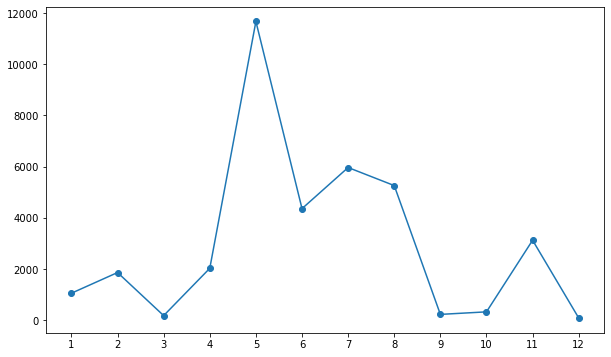

In [422]:
plt.figure(figsize=(10,6))
plt.plot(bank_no_month['month'], bank_no_month['Counts'], marker='o')
plt.xticks(range(1,13))
plt.show()

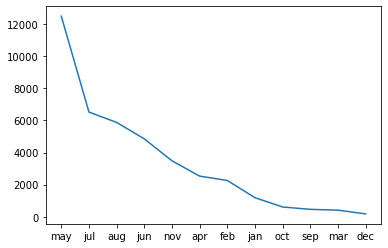

In [299]:
plt.plot(bank_month)

In [6]:
import pandas as pd

In [7]:
bank3 = '/Users/naweedahmed/Desktop/Flatiron_Feb/capstone/bank-additional-full.csv'

In [8]:
dataset1 = pd.read_csv(bank3, sep = ';')

In [9]:
dataset1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
dataset1["euribor3m"].value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
1.045       1
0.956       1
0.933       1
3.282       1
0.996       1
Name: euribor3m, Length: 316, dtype: int64

In [526]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [12]:
len(dataset1['euribor3m'].unique())

316

In [548]:
dataset1.reset_index(inplace=True)

In [549]:
dataset1.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
eur = pd.read_csv('/Users/naweedahmed/Desktop/Flatiron_Feb/capstone/LIBOR EUR.csv')

In [551]:
eur = eur[['Date','3M']]

In [14]:
eur['Date'] = pd.to_datetime(eur['Date'])
eur['3M'] = eur['3M'].astype(str)

In [17]:
eur.head()

,Date,Week day,ON,1W,1M,2M,3M,6M,12M
0,2010-11-30,Tue,0.44875,0.54125,0.75375,0.85000,0.9675,1.20500,1.48750
1,2010-11-29,Mon,0.38875,0.53875,0.75125,0.85000,0.9675,1.20625,1.49000
2,2010-11-26,Fri,0.39250,0.54250,0.75250,0.85125,0.96875,1.21000,1.49250
3,2010-11-25,Thu,0.40000,0.55500,0.75125,0.85375,0.96875,1.21000,1.49375
4,2010-11-24,Wed,0.42250,0.56625,0.75500,0.85625,0.96875,1.21000,1.49125


In [18]:
eur['Date'].max()

Timestamp('2010-12-11 00:00:00')

In [19]:
eur['Date'].min()

Timestamp('2008-01-05 00:00:00')

In [553]:
eur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 2 columns):
Date    664 non-null datetime64[ns]
3M      664 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 10.5+ KB


In [554]:
eur['euribor3m'] = eur['3M'].apply(lambda x: x[0:5])

In [555]:
eur.head()

,Date,3M,euribor3m
0,2010-11-30,0.9675,0.967
1,2010-11-29,0.9675,0.967
2,2010-11-26,0.96875,0.968
3,2010-11-25,0.96875,0.968
4,2010-11-24,0.96875,0.968


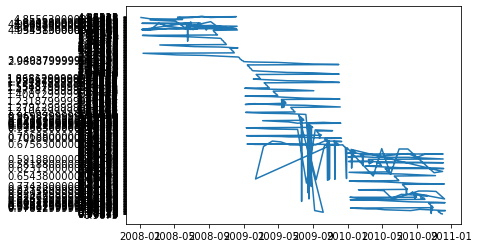

In [597]:
plt.plot(eur['Date'],eur['3M'])

In [556]:
eur['euribor3m'] = eur['euribor3m'].astype(float)

In [557]:
eur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 3 columns):
Date         664 non-null datetime64[ns]
3M           664 non-null object
euribor3m    664 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 15.7+ KB


In [558]:
results=eur.merge(dataset1, on='euribor3m', how='right')

In [559]:
results.isna().sum()

Date              21021
3M                21021
euribor3m             0
index                 0
age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
nr.employed           0
y                     0
dtype: int64

In [560]:
results.head()

,Date,3M,euribor3m,index,age,job,marital,education,default,housing,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
0,2010-11-11,0.99313,0.993,40966,74,retired,married,university.degree,no,yes,...,212,2,3,2,success,-1.1,94.601,-49.5,4963.6,no
1,2010-10-11,0.99375,0.993,40966,74,retired,married,university.degree,no,yes,...,212,2,3,2,success,-1.1,94.601,-49.5,4963.6,no
2,2010-05-11,0.99375,0.993,40966,74,retired,married,university.degree,no,yes,...,212,2,3,2,success,-1.1,94.601,-49.5,4963.6,no
3,2010-11-11,0.99313,0.993,40967,34,student,single,professional.course,no,yes,...,6,1,999,0,nonexistent,-1.1,94.601,-49.5,4963.6,no
4,2010-10-11,0.99375,0.993,40967,34,student,single,professional.course,no,yes,...,6,1,999,0,nonexistent,-1.1,94.601,-49.5,4963.6,no


In [571]:
results2 = results[['Date','3M','euribor3m','index']]

//anaconda3/envs/oy-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [572]:
results2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88029 entries, 0 to 88028
Data columns (total 4 columns):
Date         67008 non-null datetime64[ns]
3M           67008 non-null object
euribor3m    88029 non-null float64
index        88029 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.4+ MB


In [575]:
results2.dropna(subset=['Date','3M'], inplace=True)

//anaconda3/envs/oy-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [577]:
results2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67008 entries, 0 to 67007
Data columns (total 4 columns):
Date         67008 non-null datetime64[ns]
3M           67008 non-null object
euribor3m    67008 non-null float64
index        67008 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.6+ MB


In [578]:
results2.drop_duplicates(subset ="index", 
                     keep = 'first', inplace = True) 

//anaconda3/envs/oy-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [601]:
results2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20167 entries, 2010-11-11 to 2008-05-26
Data columns (total 3 columns):
3M           20167 non-null object
euribor3m    20167 non-null float64
index        20167 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 630.2+ KB


In [ ]:
	temp_data.set_index('Date', inplace=True)

In [580]:
results2.set_index('Date',inplace=True)

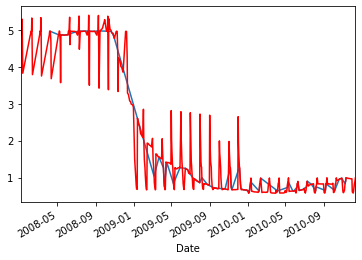

In [599]:
results2['euribor3m'].plot()

eur2['3M'].plot(color='red')
plt.show()

In [583]:
eur2 = eur.set_index('Date')

In [589]:
eur2['3M']= eur2['3M'].astype(float)

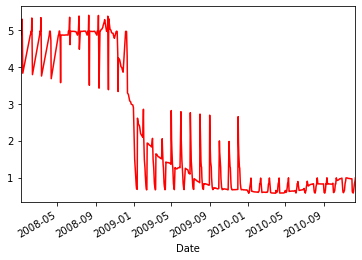

In [507]:
eur.tail()

,Date,3M,3M_trim
659,2008-07-05,4.85375,4.853
660,2008-06-05,4.855630000000001,4.855
661,2008-05-05,4.8575,4.857
662,2008-02-05,4.85625,4.856
663,2008-01-05,4.85375,4.853


In [497]:
x = 1000

In [498]:
x[0]

TypeError: 'int' object is not subscriptable

In [494]:
eur.head()

,Date,3M,3M_trim
0,2010-11-30,0.96750,0.9675
1,2010-11-29,0.96750,0.9675
2,2010-11-26,0.96875,0.9675
3,2010-11-25,0.96875,0.9675
4,2010-11-24,0.96875,0.9675


In [490]:
eur['3M'] == 4.85700

0      False
1      False
2      False
3      False
4      False
       ...  
659    False
660    False
661    False
662    False
663    False
Name: 3M, Length: 664, dtype: bool

In [485]:
#http://iborate.com/eur-libor/

In [463]:
!ls

Bitcoin Historical Data - Investing.com-2.csv
Euribor_3m.csv
Feature Engineering.ipynb
Untitled.ipynb
Untitled1.py
__pycache__
altcoins.ipynb
bank-additional-full.csv
bank-full.csv
bank2.csv
bank_cleaned.csv


In [464]:
euribor_3m = pd.read_csv('Euribor_3m.csv')

In [466]:
euribor_3m

,Data Source in SDW: https://sdw.ecb.europa.eu/quickview.do;jsessionid=A0B8DCB7DDD3853E4DDF5525E3E15385?SERIES_KEY=143.FM.M.U2.EUR.RT.MM.EURIBOR3MD_.HSTA
NaN,FM.M.U2.EUR.RT.MM.EURIBOR3MD_.HSTA
NaN,Euro area (changing composition) - Money Marke...
Collection:,Average of observations through period (A)
Period\Unit:,[Percent per annum ]
2020Apr,-0.2540
...,...
1994May,6.2400
1994Apr,6.5700
1994Mar,6.7500
1994Feb,6.8600


In [ ]:
https://www.quandl.com/api/v3/datasets/BOF/QS_D_IEUTIO3M.csv?api_key=bir6nWyygJHXLd_7QsXu

In [442]:
bank3_col

'age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'

In [443]:
bank3_col = bank3_col.split(';"')

In [447]:
bank3_col

['age',
 'job"',
 'marital"',
 'education"',
 'default"',
 'housing"',
 'loan"',
 'contact"',
 'month"',
 'day_of_week"',
 'duration"',
 'campaign"',
 'pdays"',
 'previous"',
 'poutcome"',
 'emp.var.rate"',
 'cons.price.idx"',
 'cons.conf.idx"',
 'euribor3m"',
 'nr.employed"',
 'y"']